# Guia 1: EDA básico y Modelado con Regresión Lineal y Logística
### Autora: Marian Alejandra Sierra Aranzazu

Importamos librerías

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression,SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score, confusion_matrix, f1_score
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler



Agregamos función para identificar el porcentaje de datos nulos por columna

In [196]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    return missing_data  

Llamamos sets de data de entrenamiento y testeo

In [197]:
train_path= "house-prices-advanced-regression-techniques/train.csv"
df_train = pd.read_csv(train_path)

test_path = "house-prices-advanced-regression-techniques/test.csv"
df_test = pd.read_csv(train_path)


In [198]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Tratamiento

En este caso se dropea ID porque no tiene influencia en el set

In [199]:
df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

In [200]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Porcentaje de Nulos por COL

In [201]:
missing_data(df_train).head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Acá dropeamos columnas con porcentajes muy altos de nulos. En los demás casos si son categóricos reemplazamos por 'Missing', y si es numérico usamos la media para reemplazar

In [202]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
df_train = df_train.drop(columns=cols_to_drop)
df_test = df_test.drop(columns=cols_to_drop)

In [203]:
cols_types =['LotFrontage','GarageQual','GarageType','GarageFinish','GarageCond','GarageYrBlt','BsmtExposure','BsmtFinType2','BsmtQual'
             ,'BsmtFinType1','BsmtCond','MasVnrArea','Electrical']

categorical_cols_NULLS = [col for col in df_train[cols_types].columns if df_train.dtypes[col] == 'object']
df_train[categorical_cols_NULLS] = df_train[categorical_cols_NULLS].fillna('Missing')
df_test[categorical_cols_NULLS] = df_test[categorical_cols_NULLS].fillna('Missing')


In [204]:
numerical_cols_NULLS = [col for col in df_train[cols_types].columns if df_train.dtypes[col] != 'object']
for col in numerical_cols_NULLS:
    median_value = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_value)
    df_test[col] = df_test[col].fillna(median_value)
    

# Exploracion

En esta etapa se crean facegrids por tipo de dato para ver su distribución

Conteos de columnas numéricas y categóricas

In [205]:
numerical_cols = [col for col in df_train.columns if df_train.dtypes[col] != 'object']
#numerical_cols.remove('SalePrice')
categorical_cols = [col for col in df_train.columns if df_train.dtypes[col] == 'object']
print(f"Columnas numericas: {len(numerical_cols)}")
print(f"Columnas categoricas: {len(categorical_cols)}")

Columnas numericas: 37
Columnas categoricas: 37


Distribución de sales price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


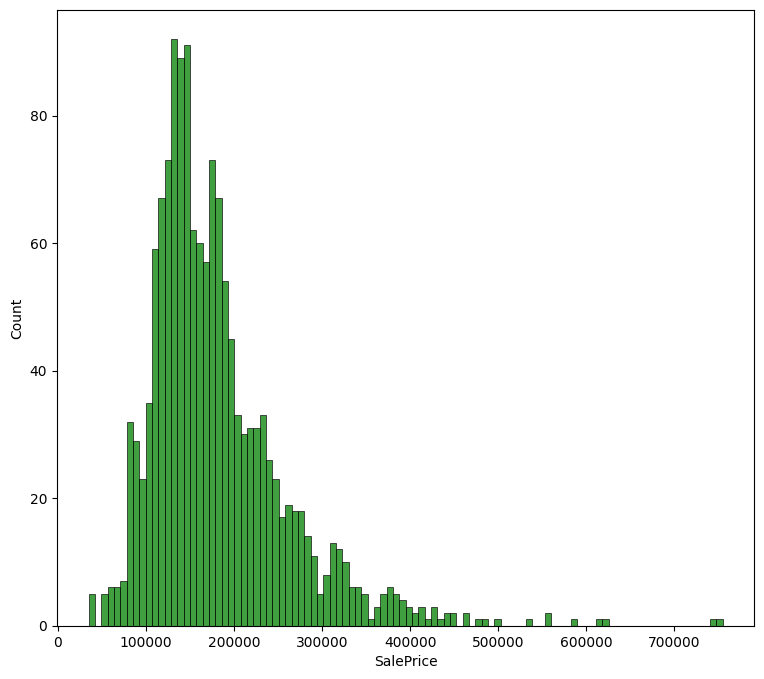

In [206]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df_train['SalePrice'], color='g', bins=100);

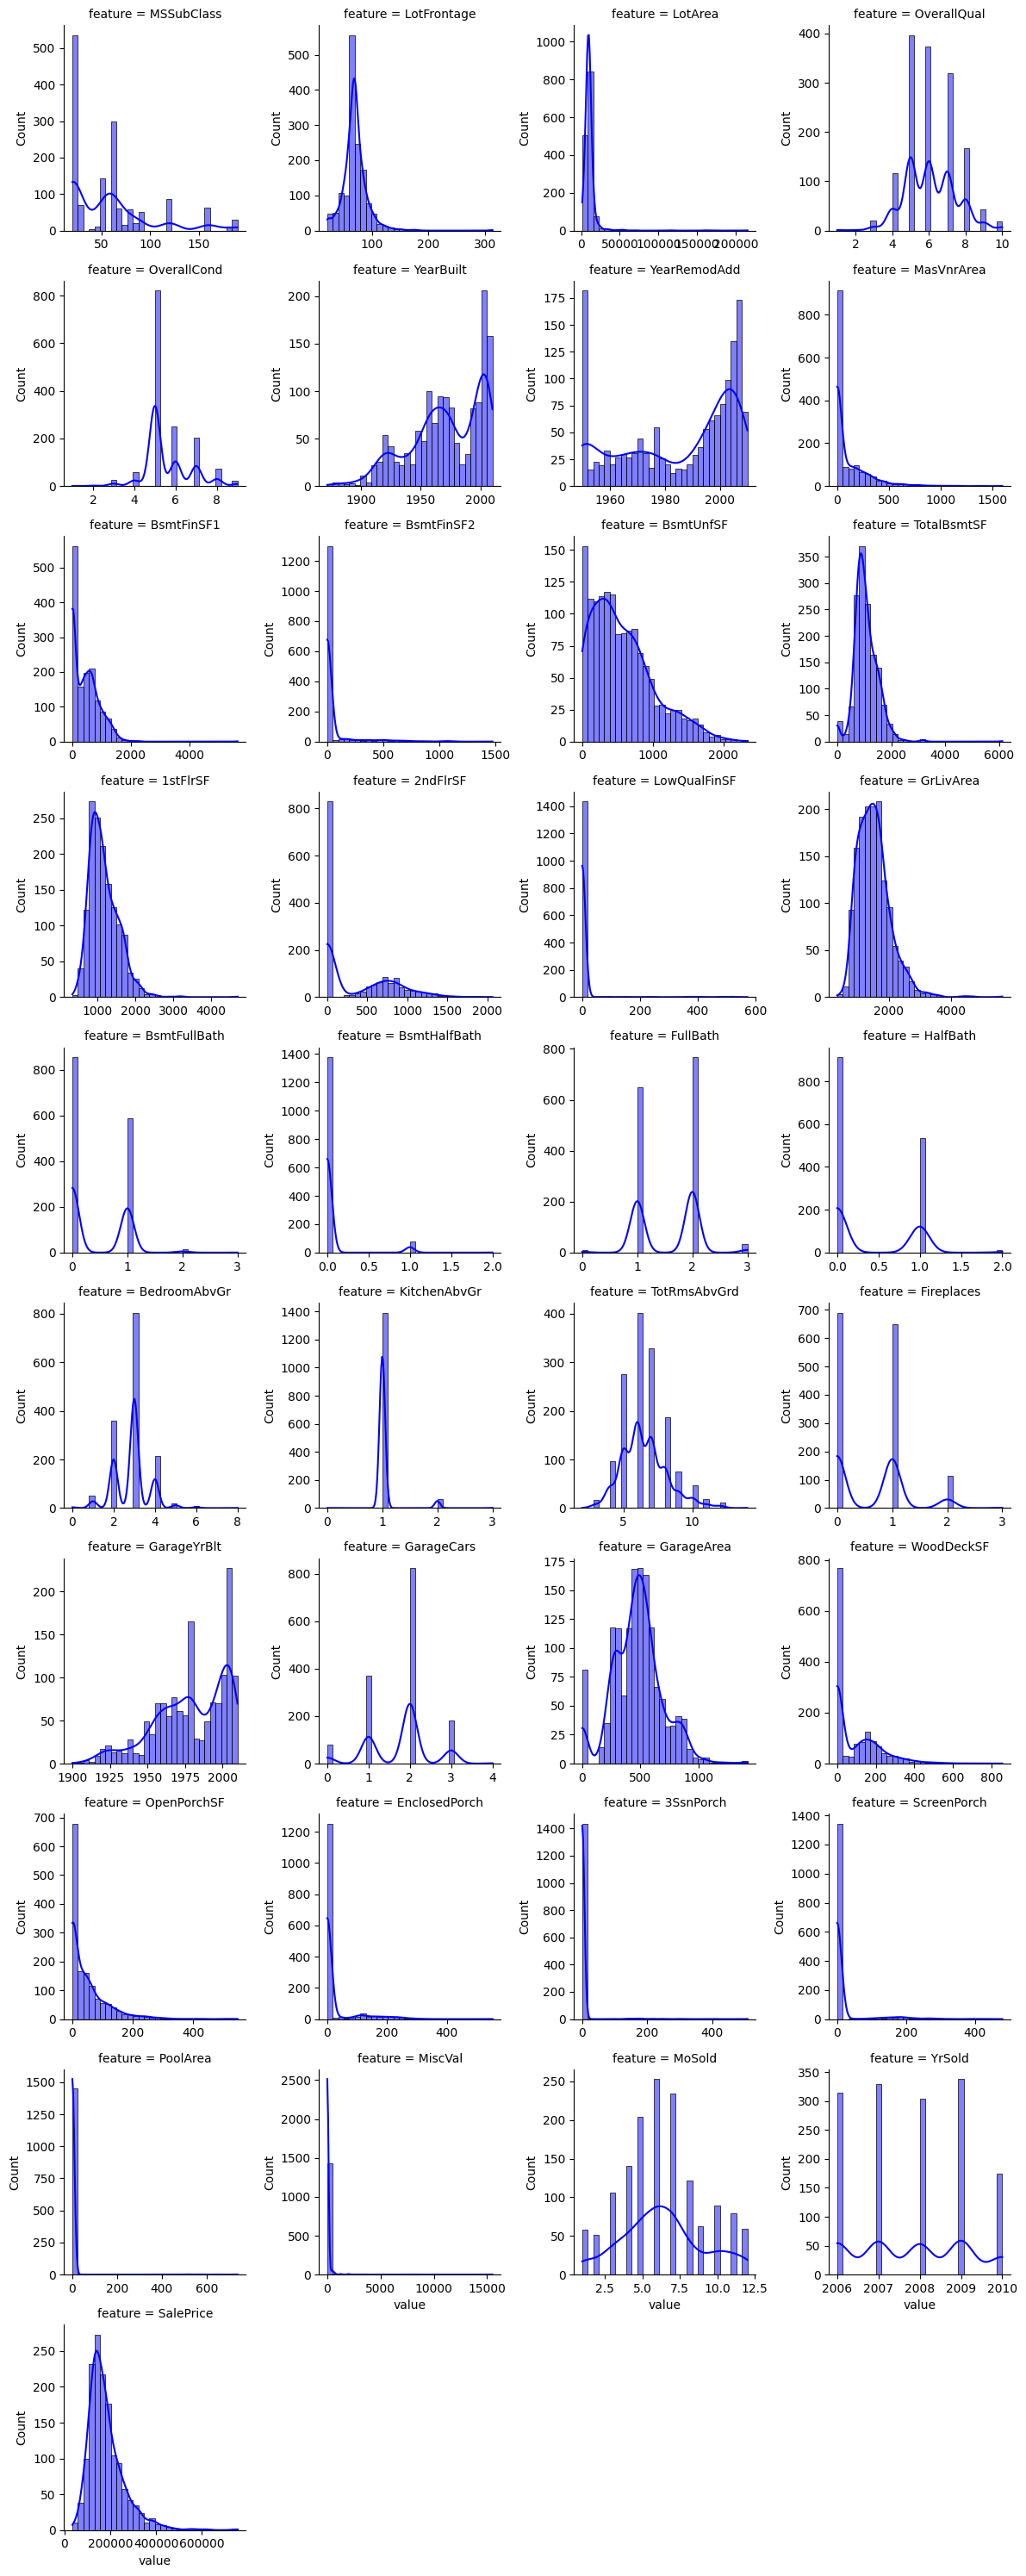

In [207]:
df_melted = df_train[numerical_cols].melt(var_name='feature', value_name='value') 
#facegrid
g = sns.FacetGrid(df_melted, col='feature', col_wrap=4, sharex=False, sharey=False, height=3)
g.map(sns.histplot, 'value', kde=True, bins=30, color='blue')

plt.show()

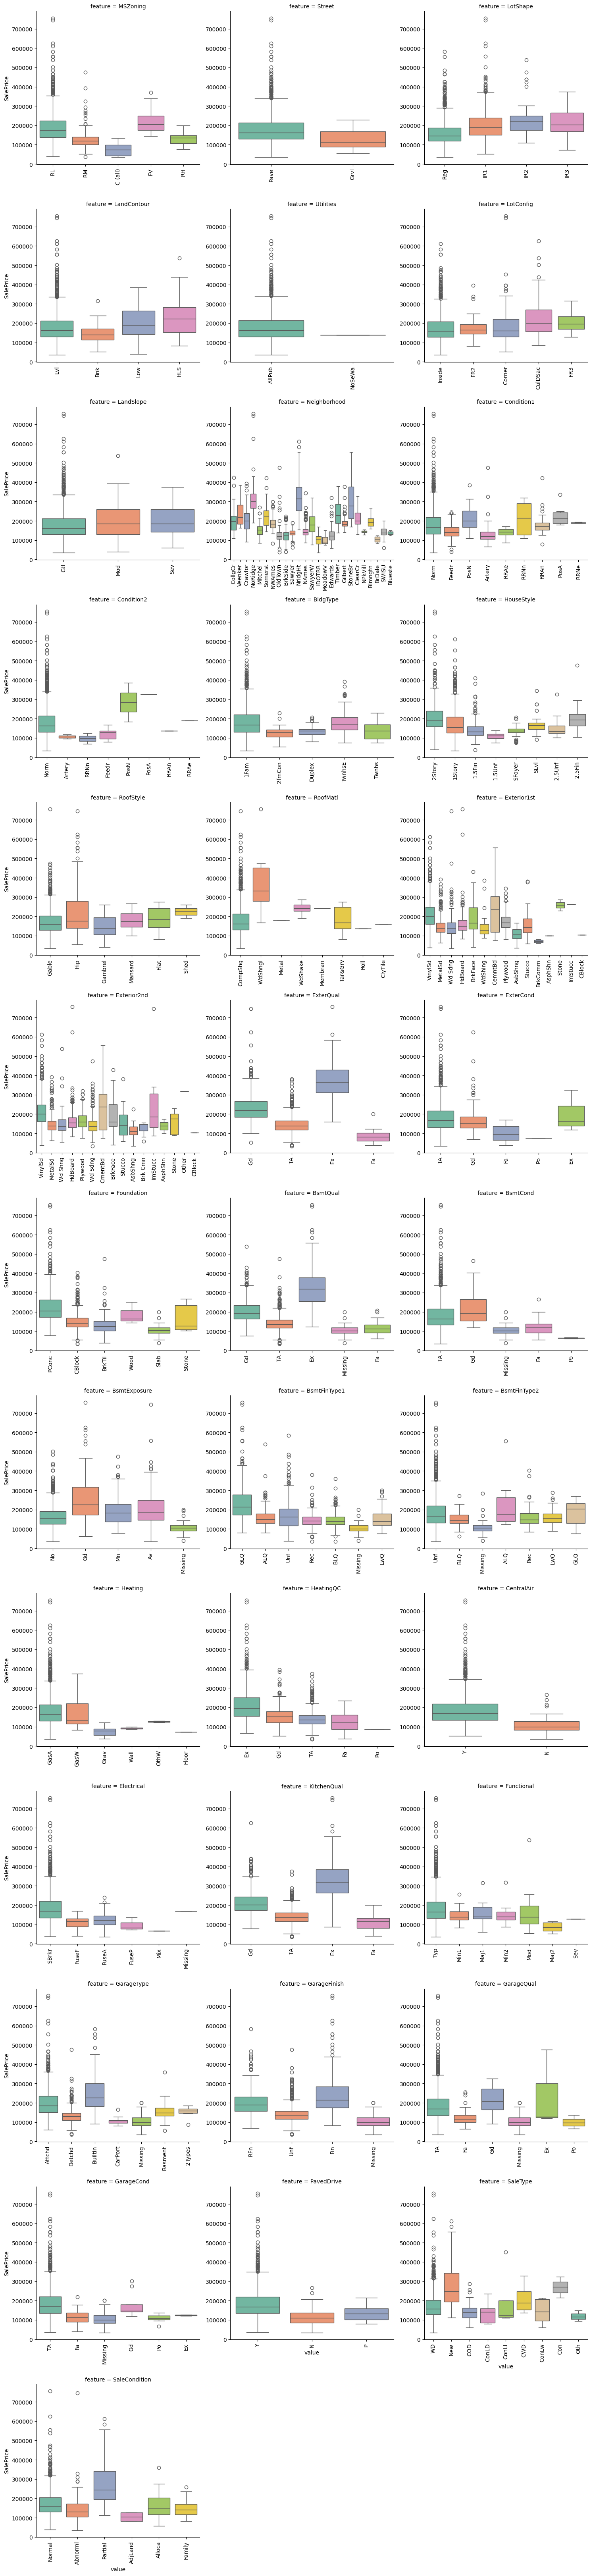

In [208]:
df_cat_melted = df_train[categorical_cols + ['SalePrice']].melt(id_vars='SalePrice', var_name='feature', value_name='value')
g = sns.FacetGrid(df_cat_melted, col='feature', col_wrap=3, sharex=False, sharey=False, height = 5)
g.map_dataframe(sns.boxplot, x='value', y='SalePrice', hue='value', dodge=False, legend=False, palette='Set2')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
g.tight_layout()
plt.show()

Creamos dummies para categóricas. En ese caso no se cambia por labels por el tipo de modelo que se va a usar y la naturaleza de la mayoría de estas variables categoricas

In [209]:
df_encoded = pd.get_dummies(df_train, drop_first=True)
df_test_enc = pd.get_dummies(df_test, drop_first=True)

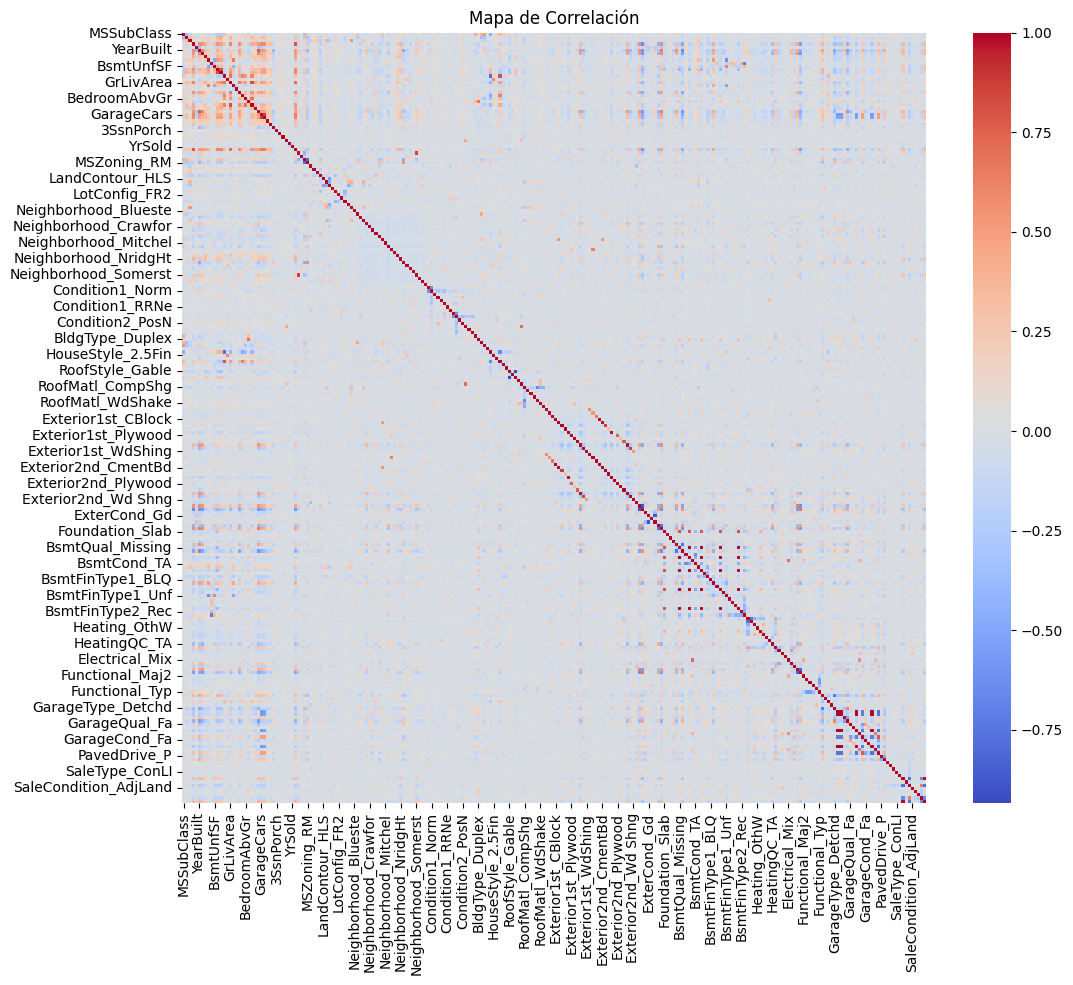

In [210]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()

# Seleccion de Variables

Revisamos correlaciones unicamente con la variable objetivo

In [211]:
correlations = df_encoded.corr()['SalePrice'].sort_values(ascending=False)
correlations.head(30)

SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
Foundation_PConc         0.497734
MasVnrArea               0.472614
Fireplaces               0.466929
GarageYrBlt              0.466754
ExterQual_Gd             0.452466
BsmtFinType1_GLQ         0.434597
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
GarageType_Attchd        0.335961
LotFrontage              0.334771
Neighborhood_NoRidge     0.330424
WoodDeckSF               0.324413
KitchenQual_Gd           0.321641
2ndFlrSF                 0.319334
OpenPorchSF              0.315856
BsmtExposure_Gd          0.307298
Exterior2nd_Vi

Usamos la funcion SelectKBest para evaluar a través del estadistico F. Un valor alto significa que la feature tiene una relacion fuerte con el Precio de Venta

In [212]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']
X = X.applymap(lambda x: int(x) if type(x) == bool else x)

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
selected_features

C:\Users\maria\AppData\Local\Temp\ipykernel_24988\700408175.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: int(x) if type(x) == bool else x)


Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'ExterQual_TA'],
      dtype='object')

# Modelos

## Regresion Lineal

In [213]:
X_train = df_encoded[selected_features]
y_train = df_encoded['SalePrice']

X_test = df_test_enc[selected_features]

y_test = df_test_enc['SalePrice']

In [214]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


MAE: 24092.47
MSE: 1433398481.66
RMSE: 37860.25
R²: 0.7727


En promedio, el modelo se equivoca por $24,092 al predecir el precio de una casa y explica aproximadamente el 77.3% de la variabilidad del precio de las casas. No es perfecto, pero es bastante decente.

In [215]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

        Feature   Coefficient
0   OverallQual  19422.706828
9  ExterQual_TA -11404.792204
7    GarageCars  10435.867747
5      FullBath  -6297.892058
1     YearBuilt    291.888313
6  TotRmsAbvGrd    272.795120
4     GrLivArea     49.916870
2   TotalBsmtSF     18.352052
3      1stFlrSF     15.312057
8    GarageArea     14.025578


|    Feature   | Coeficiente |                                                                                     Interpretación                                                                                     |
|:------------:|:-----------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| OverallQual  | 19,422.71   | Por cada punto adicional en la calidad general de la casa, el precio aumenta en promedio $19,422. Muy influyente.                                                                      |
| GarageCars   | 10,435.87   | Cada carro adicional que cabe en el garaje aumenta el precio en $10,435.                                                                                                               |
| ExterQual_TA | -11,404.79  | Tener una calidad exterior "TA" (Typical/Average) en lugar de "Excellent" se asocia con una disminución de $11,404. Esto es un dummy comparando con la base.      |
| FullBath     | -6,297.89   | Sorprendentemente, un baño completo adicional se asocia con una disminución del precio en $6,297. Puede deberse a correlación con otros factores o a que baños están mal distribuidos. |
| YearBuilt    | 291.89      | Por cada año más reciente de construcción, el precio sube en promedio $291. Las casas más nuevas valen más.                                                                            |
| TotRmsAbvGrd | 272.80      | Cada habitación adicional sobre el suelo aumenta el precio en $273 (aunque parece tener menor peso que otros).                                                                         |
| GrLivArea    | 49.92       | Cada pie cuadrado adicional de área habitable sobre el suelo aumenta el precio en $50.                                                                                                 |
| TotalBsmtSF  | 18.35       | Cada pie cuadrado adicional de sótano total agrega $18 al precio.                                                                                                                      |
| 1stFlrSF     | 15.31       | Cada pie cuadrado adicional del primer piso agrega $15 al precio.                                                                                                                      |
| GarageArea   | 14.03       | Cada pie cuadrado adicional en el garaje agrega $14 al precio.                                                                                                                         |

## Modelo SGD

In [216]:
#escalamos datos, importante
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='adaptive', eta0=0.01, random_state=42)
sgd.fit(X_train_scaled, y_train)

y_pred_sgd = sgd.predict(X_test_scaled)


mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("Métricas para SGDRegressor:")
print(f"MAE:  {mae_sgd:.2f}")
print(f"MSE:  {mse_sgd:.2f}")
print(f"RMSE: {rmse_sgd:.2f}")
print(f"R²:   {r2_sgd:.4f}")

Métricas para SGDRegressor:
MAE:  24101.59
MSE:  1433407457.65
RMSE: 37860.37
R²:   0.7727


Los datos parecen muy similares a la regresión regular. Esto puede deberse al tamaño y variabilidad de los datos. Tambien podría ser por la selección de variables

## Regresion Logistica

Se crea la variable High Price usando la media y las desviacion. En este caso toda casa con un precio de venta 1 desviacion por encima de la media, se clasifica como precio alto.

In [217]:
mean_price = df_encoded['SalePrice'].mean()
std_price = df_encoded['SalePrice'].std()

df_encoded['HighPrice'] = ((df_encoded['SalePrice'] > mean_price + 1 * std_price)).astype(int)

df_test_enc['HighPrice'] = ((df_test_enc['SalePrice'] > mean_price + 1 * std_price)).astype(int)


In [221]:
X_train = df_encoded.drop(columns=['HighPrice', 'SalePrice'])  
y_train = df_encoded['HighPrice']  

X_test = df_test_enc.drop(columns=['HighPrice', 'SalePrice'])  
y_test = df_test_enc['HighPrice']  

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1 Score: {f1:.4f}")

# Ver los coeficientes
coefficients = pd.DataFrame(log_reg_model.coef_[0], X_train.columns, columns=["Coeficiente"])
#print(coefficients)

#odds ratios
odds_ratios = np.exp(coefficients["Coeficiente"])
odds_ratios_sorted = odds_ratios.sort_values(ascending=False)
print(odds_ratios_sorted.head(20))



Logistic Regression Performance:
Accuracy: 0.9890
Confusion Matrix:
[[1263    6]
 [  10  181]]
F1 Score: 0.9577
OverallQual             6.757016
LandContour_Lvl         3.598497
YearRemodAdd            2.621811
LandContour_HLS         2.517229
Neighborhood_NridgHt    2.295479
GrLivArea               2.292667
2ndFlrSF                2.279193
WoodDeckSF              2.180894
Fireplaces              2.170442
RoofMatl_WdShngl        2.128836
LotConfig_CulDSac       2.065990
Neighborhood_NoRidge    2.065004
RoofMatl_CompShg        2.009729
GarageCars              1.975071
SaleCondition_Normal    1.967634
Neighborhood_SawyerW    1.955444
Street_Pave             1.921952
LandSlope_Mod           1.886449
SaleType_New            1.861435
SaleCondition_Alloca    1.852093
Name: Coeficiente, dtype: float64


La tabla de arriba muestra los odd ratio.
- OverallQual tiene el odd ratio más alto (6.76), lo que indica que las casas con una mejor calidad (según la variable OverallQual) tienen significativamente más probabilidades de ser clasificadas como de "precio alto".
- LandContour_Lvl (3.60) y YearRemodAdd (2.62) también son muy influyentes, lo que sugiere que el tipo de terreno nivelado y la renovación reciente de la casa son características que aumentan las probabilidades de que el precio sea alto.

En resumen, las variables relacionadas con la calidad general de la casa y la ubicación parecen ser las más determinantes para clasificar una casa como de precio alto, mientras que variables como GarageCars y SaleCondition_Normal tienen un impacto más moderado.

## SGD Reg Logistica

In [220]:

sgd_model = SGDClassifier(max_iter=1000)
sgd_model.fit(X_train_scaled, y_train)

y_pred_sgd = sgd_model.predict(X_test_scaled)

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

print("\nSGDClassifier Performance:")
print(f"Accuracy: {accuracy_sgd:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_sgd}")
print(f"F1 Score: {f1_sgd:.4f}")

coefficients = pd.DataFrame(sgd_model.coef_[0], X_train.columns, columns=["Coeficiente"])
#print(coefficients)

odds_ratios = np.exp(coefficients["Coeficiente"])
odds_ratios_sorted = odds_ratios.sort_values(ascending=False)
print(odds_ratios_sorted.head(20))


SGDClassifier Performance:
Accuracy: 0.9788
Confusion Matrix:
[[1259   10]
 [  21  170]]
F1 Score: 0.9164
OverallQual             1.126568e+29
YearRemodAdd            5.733287e+18
Fireplaces              1.054191e+14
Neighborhood_Crawfor    1.828685e+13
Foundation_Stone        8.231156e+11
FullBath                6.457360e+11
Exterior1st_BrkFace     5.500312e+11
Neighborhood_NridgHt    2.783944e+11
LandContour_Lvl         2.225548e+11
WoodDeckSF              2.012044e+11
GarageCars              1.642124e+11
OverallCond             1.568983e+11
GrLivArea               6.503698e+10
Condition1_PosN         1.032435e+10
Condition1_Norm         3.499325e+09
RoofMatl_Tar&Grv        2.320933e+09
GarageType_BuiltIn      2.281160e+09
Neighborhood_SawyerW    1.889792e+09
SaleCondition_Alloca    7.010280e+08
ExterQual_Gd            6.838768e+08
Name: Coeficiente, dtype: float64


# Conclusión reflexiva
- ¿Qué variables fueron las más influyentes en cada modelo y por qué?
- ¿Qué tan buenos fueron los resultados y qué diferencias observaste al usar gradiente descendente?
- ¿Qué mejorarías o harías diferente en futuros proyectos similares?

Tanto en el modelo de regresión lineal como en la regresión logística, la calidad general de la vivienda (OverallQual) y el tamaño de la vivienda (GrLivArea) son factores clave para determinar tanto el precio como la probabilidad de un precio alto. Sin embargo, en la regresión logística, factores como el vecindario y la configuración del terreno juegan un papel más importante, mientras que en la regresión lineal, el tamaño de las habitaciones y las áreas de garaje tienen un impacto más directo en el precio.

Los resultados de la regresión logística fueron más precisos que los de la regresión lineal. Sin embargo, esto es muy seguramente por las selección de variables, ya que en la clasificación se trabajó con todas las variables, y para la regresión se pudo haber hecho un estudio más profundo para la selección. En cuanto al uso del gradiente descendente, en este caso no tuvo casi influencia en los resultados.

En futuros proyectos me gustaría tener un proceso más detallado y sustentado a la hora de seleccionar variables. Sería útil saber que hacer si por ejemplo fueran 1000 variables, cómo se seleccionarian, qué pruebas se deberían hacer, etc.